# Project 4

- Leonardo Meireles Murtha Oliveira : 4182085

In [5]:
# Standard libs
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [2]:
def degree_distribution(G):
    """
    Returns : degree k distribution, k values
    """
    # Dict of degrees {node: node_degree}
    vk = np.array([vk[1] for vk in G.degree()])
    
    # max degree in the graph
    max_k = np.max(vk)
    
    # max_k + 1 because it goes from [0, max)
    k_values = np.arange(0, max_k + 1)
    
    # Initializing pk
    pk = np.zeros(max_k + 1)
    
    # Counting the k's
    for k in vk:
        pk[k] += 1
    
    # Degree distribution calculation
    pk_sum = pk.sum()
    pk = pk/pk_sum
    
    return pk, k_values

In [3]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

In [4]:
def avg_degree(G):
    dk = dict(G.degree())
    vk = list(dk.values())
    return np.mean(vk)

In [6]:
import seaborn as sns
sns.set()

def plot_degree_distribution(G1, netname):
    pk, k_values = degree_distribution(G1)
    plt.figure(figsize=(15, 8))

    fig = plt.subplot(1, 2, 1)
    plt.plot(k_values, pk, 'ro')
    plt.xlabel("k", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.title("Degree distribution of %s" % netname, fontsize=20)
    plt.grid(True)
    # Plotting the distribution
    sns.distplot(pk, color='r')
    pk, k_values = degree_distribution(G1)

    # Plotting with log scale
    fig = plt.subplot(1, 2, 2)
    fig.set_xscale('log')
    fig.set_yscale('log')
    plt.plot(k_values, pk, 'ro')
    plt.xlabel("k", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.title("Log Degree distribution of %s" % netname, fontsize=20)
    plt.grid(True)
    plt.show(True)

In [7]:
def connected_component_subgraphs(G):
    return [G.subgraph(c).copy() for c in nx.connected_components(G)]

# 1. Failures	and	attacks

• Simulate	failures	in	the	following	networks,	obtaining	the	size	of	the	
largest	component	versus	the	fraction	of	removed	nodes:

    a. Erdös-Rényi	networks,
    
    b. Barabási-Albert	scale-free	networks,
    
    c. Small-world	networks	for	p=0.001,	p=0.01	and	p=0.1.
    
    d. Which	network	is	the	most	robust	against	failures?	(Each	point	must	be	an	average	over	at	least	10	simulations).
    
• Perform	the	same	analysis	as	before,	but	for	the	case	of	attacks.

• Compare	the	protein	networks	in	terms	of	failures	and	attacks.	Which	
species	is	the	most	robust?	Consider	the	datasets:
    o Human	protein	network	(http://konect.cc/networks/maayan-vidal)

    a. C.	elegans	protein	network	2007	(http://interactome.dfci.harvard.edu/C_elegans/index.php?page=download)
    
    b. Mosquito	interaction	network	(A.	aegypti)(https://staticcontent.springer.com/esm/art%3A10.1186%2F1471-2164-11-380/MediaObjects/12864_2009_2974_MOESM1_ESM.XLS)

Failures occur with the random removal of nodes or edges. At each time step, a node is selected at random and removed from the largest component of the network. The size of the largest component in function of the fraction of removed nodes quantifies the resilience of the network. A function to simulate failures in networks is given as follows.

In [31]:
import random


def failures(H):
    G = H.copy()
    N0 = len(G)
    vn = []
    S = []
    n = 0  # number of nodes removed

    # Reducing graph to 10% of of it original nodes i.e removing 90% of the nodes
    while(len(G.nodes()) > int(0.01*N0)):
        nodes = list(G.nodes())
        node = random.choice(nodes)  # select the node on the largest component
        G.remove_node(node)
        Glc = max(connected_component_subgraphs(G), key=len)
        S.append(len(Glc)/N0)  # store the size of the largest component
        n = n + 1
        vn.append(n/N0)

    return S, vn

The simulation of attacks is performed by removing the most connected nodes according in order of the degree, i.e. initially we remove the most connected, then next most connected and so on.

In [60]:
def most_connected(G):  # This function is used to find the most connected node
    node = max(G.nodes(), key=G.degree)
    return node


def attacks(H):
    G = H.copy()
    N0 = len(G)
    vn = []
    S = []
    n = 0  # number of nodes removed
    
    while(len(G.nodes()) > int(0.01*N0)):
        # select the most connected node on the largest component
        node = most_connected(G)
        G.remove_node(node)
        Glc = max(connected_component_subgraphs(G),
                  key=len)
        S.append(len(Glc)/N0)  # store the size of the largest component
        n = n + 1
        vn.append(n/N0)
    
    return S, vn

In [52]:
K_iterations = 10
N = 300
av_degree = 10
m = int(av_degree/2)

Barabasi-Albert.  
N = 1000 < k > = 10

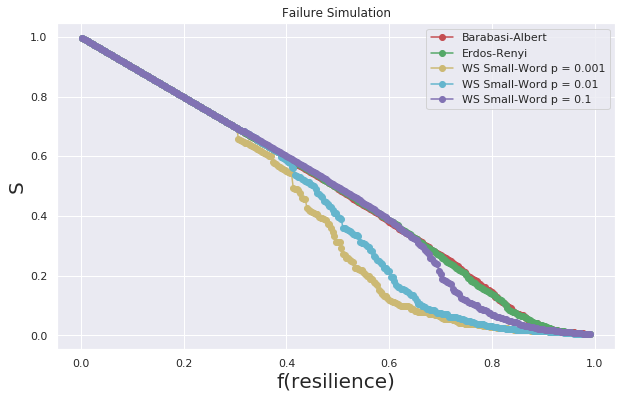

In [62]:
Sba = []
vba = []
Sed = []
ved = []
Ssw1 = []
vsw1 = []
Ssw2 = []
vsw2 = []
Ssw3 = []
vsw3 = []


for _ in range(K_iterations):
    ba = nx.barabasi_albert_graph(N, m)
    lSba, lvba = failures(ba)
    Sba.append(lSba)
    vba.append(lvba)

    ed = nx.erdos_renyi_graph(N, p=0.03)
    lSed, lved = failures(ed)
    Sed.append(lSed)
    ved.append(lved)

    sw1 = nx.watts_strogatz_graph(N, av_degree, p=0.001)
    lSsw1, lvsw1 = failures(sw1)
    Ssw1.append(lSsw1)
    vsw1.append(lvsw1)

    sw2 = nx.watts_strogatz_graph(N, av_degree, p=0.01)
    lSsw2, lvsw2 = failures(sw2)
    Ssw2.append(lSsw2)
    vsw2.append(lvsw2)

    sw3 = nx.watts_strogatz_graph(N, av_degree, p=0.1)
    lSsw3, lvsw3 = failures(sw3)
    Ssw3.append(lSsw3)
    vsw3.append(lvsw3)


Sba = np.mean(Sba, axis=0)
vba = np.mean(vba, axis=0)

Sed = np.mean(Sed, axis=0)
ved = np.mean(ved, axis=0)

Ssw1 = np.mean(Ssw1, axis=0)
vsw1 = np.mean(vsw1, axis=0)

Ssw2 = np.mean(Ssw2, axis=0)
vsw2 = np.mean(vsw2, axis=0)

Ssw3 = np.mean(Ssw3, axis=0)
vsw3 = np.mean(vsw3, axis=0)


plt.figure(figsize=(10, 6))
plt.title('Failure Simulation')
plt.plot(vba, Sba, '-or', label='Barabasi-Albert')
plt.plot(ved, Sed, '-og', label='Erdos-Renyi')
plt.plot(vsw1, Ssw1, '-oy', label='WS Small-Word p = 0.001')
plt.plot(vsw2, Ssw2, '-oc', label='WS Small-Word p = 0.01')
plt.plot(vsw3, Ssw3, '-om', label='WS Small-Word p = 0.1')

plt.xlabel("f(resilience)", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.legend()
plt.grid(True)
plt.show()

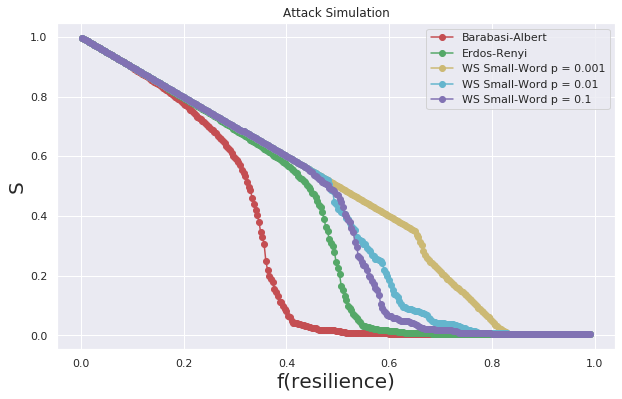

In [61]:
Sba = []
vba = []
Sed = []
ved = []
Ssw1 = []
vsw1 = []
Ssw2 = []
vsw2 = []
Ssw3 = []
vsw3 = []


for _ in range(K_iterations):
    ba = nx.barabasi_albert_graph(N, m)
    lSba, lvba = attacks(ba)
    Sba.append(lSba)
    vba.append(lvba)

    ed = nx.erdos_renyi_graph(N, p=0.03)
    lSed, lved = attacks(ed)
    Sed.append(lSed)
    ved.append(lved)

    sw1 = nx.watts_strogatz_graph(N, av_degree, p=0.001)
    lSsw1, lvsw1 = attacks(sw1)
    Ssw1.append(lSsw1)
    vsw1.append(lvsw1)

    sw2 = nx.watts_strogatz_graph(N, av_degree, p=0.01)
    lSsw2, lvsw2 = attacks(sw2)
    Ssw2.append(lSsw2)
    vsw2.append(lvsw2)

    sw3 = nx.watts_strogatz_graph(N, av_degree, p=0.1)
    lSsw3, lvsw3 = attacks(sw3)
    Ssw3.append(lSsw3)
    vsw3.append(lvsw3)


Sba = np.mean(Sba, axis=0)
vba = np.mean(vba, axis=0)

Sed = np.mean(Sed, axis=0)
ved = np.mean(ved, axis=0)

Ssw1 = np.mean(Ssw1, axis=0)
vsw1 = np.mean(vsw1, axis=0)

Ssw2 = np.mean(Ssw2, axis=0)
vsw2 = np.mean(vsw2, axis=0)

Ssw3 = np.mean(Ssw3, axis=0)
vsw3 = np.mean(vsw3, axis=0)


plt.figure(figsize=(10, 6))
plt.title(label='Attack Simulation')
plt.plot(vba, Sba, '-or', label='Barabasi-Albert')
plt.plot(ved, Sed, '-og', label='Erdos-Renyi')
plt.plot(vsw1, Ssw1, '-oy', label='WS Small-Word p = 0.001')
plt.plot(vsw2, Ssw2, '-oc', label='WS Small-Word p = 0.01')
plt.plot(vsw3, Ssw3, '-om', label='WS Small-Word p = 0.1')

plt.xlabel("f(resilience)", fontsize=20)
plt.ylabel("S", fontsize=20)
plt.legend()
plt.grid(True)
plt.show()